# Universidade de Fortaleza
Mestrado em Ciência de Dados e Inteligência Artificial

Professor: Luciano Gallegos Marin

Aluno: Marcus Miranda

Trabalho: Redes convolucionais

## Fonte dos Dados

Usaremos como fonte de dados, o famoso dataset Dogs and Cats oferecido pelo Kaggle

Conjunto de dados de treino: Teremos 12.500 imagens de cães e 12.500 imagens de gatos para o conjunto de treinamento.

Conjunto de dados de validação: Teremos 12.500 imagens de cães e gatos.

Conjunto de dados de teste: Teremos 1.000 imagens de cães e gatos.

https://www.kaggle.com/c/dogs-vs-cats/data

## Carregando os Dados

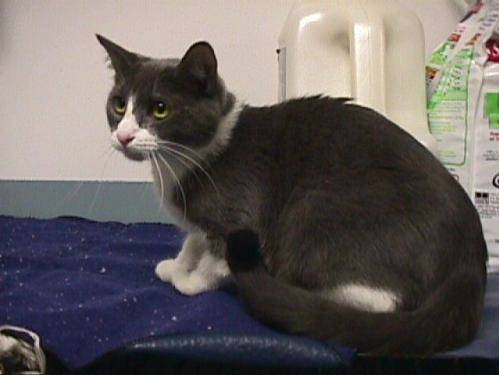

In [1]:
from IPython.display import Image
Image(filename = 'dataset_treino/cats/cat.4.jpg')

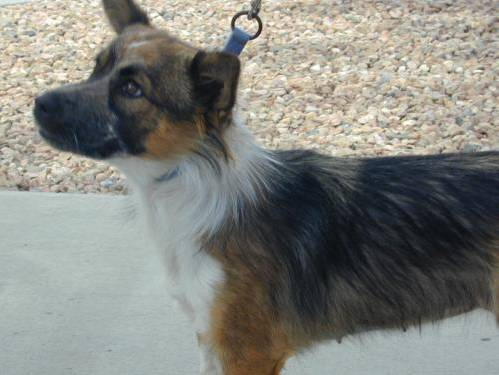

In [2]:
Image(filename='dataset_treino/dogs/dog.3.jpg')

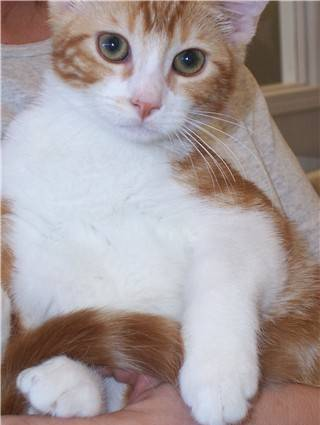

In [3]:
Image(filename='dataset_treino/cats/cat.9.jpg')

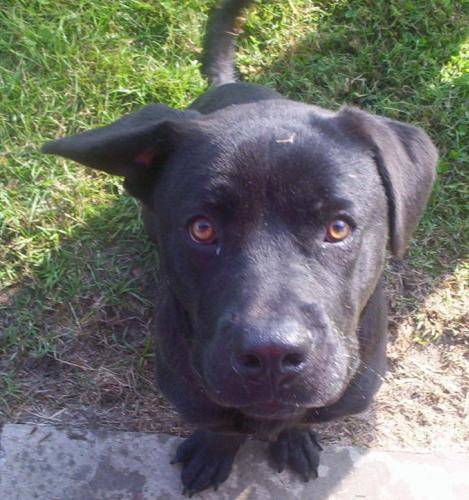

In [4]:
Image(filename='dataset_treino/dogs/dog.8.jpg')

## Construindo a Rede Neural Convolucional

In [5]:
# Imports
import tensorflow as tf
import keras as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [6]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [7]:
# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [8]:
# Passo 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [9]:
# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

In [10]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [11]:
# Passo 3 - Flattening
classifier.add(Flatten())

In [12]:
# Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [13]:
# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Neste ponto temos nossa rede construída. Precisamos agora treiná-la.

## Treinando a Rede Neural Convolucional

### Pré-Processamento

In [14]:
%%time
# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)


Wall time: 33.5 ms


In [15]:
# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory('dataset_treino',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('dataset_validation',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 25000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


### Treinamento

In [29]:
%%time
classifier.fit(training_set,
                         steps_per_epoch = 80,
                         epochs =30,
                         validation_data = validation_set,
                         validation_steps = 2000)

Epoch 1/30
80/80 [==============================] - 65s 794ms/step - loss: 0.6275 - accuracy: 0.6530
Epoch 2/30
80/80 [==============================] - 75s 936ms/step - loss: 0.6164 - accuracy: 0.6602
Epoch 3/30
80/80 [==============================] - 72s 907ms/step - loss: 0.6048 - accuracy: 0.6848
Epoch 4/30
80/80 [==============================] - 47s 589ms/step - loss: 0.5971 - accuracy: 0.6910
Epoch 5/30
80/80 [==============================] - 36s 449ms/step - loss: 0.5694 - accuracy: 0.7070
Epoch 6/30
80/80 [==============================] - 38s 482ms/step - loss: 0.5555 - accuracy: 0.7207
Epoch 7/30
80/80 [==============================] - 34s 424ms/step - loss: 0.5521 - accuracy: 0.7234
Epoch 8/30
80/80 [==============================] - 30s 374ms/step - loss: 0.5245 - accuracy: 0.7457
Epoch 9/30
80/80 [==============================] - 26s 316ms/step - loss: 0.5266 - accuracy: 0.7301
Epoch 10/30
80/80 [==============================] - 33s 410ms/step - loss: 0.5126 - accura

## Fazendo Previsões

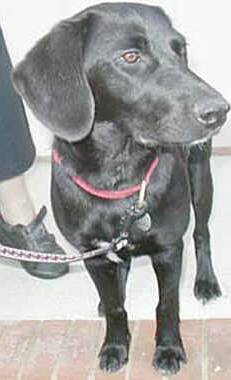

In [17]:
# Primeira Imagem
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('dataset_teste/2216.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

Image(filename='dataset_teste/2216.jpg')

In [18]:
# Previsão da primeira imagem
prediction

'Cachorro'

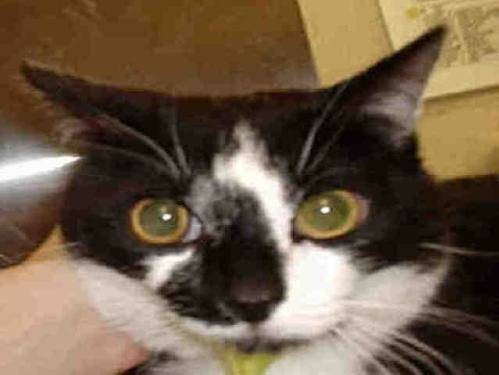

In [19]:
# Segunda Imagem
test_image = image.load_img('dataset_teste/2897.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

Image(filename='dataset_teste/2897.jpg')

In [20]:
# Previsão da segunda imagem
prediction

'Cachorro'

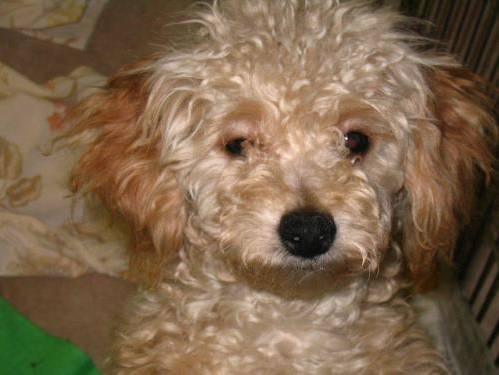

In [21]:
# Terceira Imagem
test_image = image.load_img('dataset_teste/2891.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'cat'

Image(filename='dataset_teste/2891.jpg')

In [22]:
# Previsão da terceira imagem
prediction

'Cachorro'

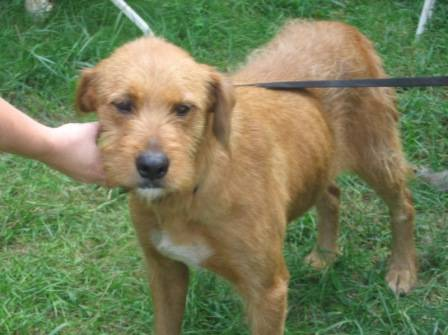

In [23]:
# Quarta Imagem
test_image = image.load_img('dataset_teste/2892.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

Image(filename='dataset_teste/2892.jpg')

In [24]:
# Previsão da quarta imagem
prediction

'Cachorro'

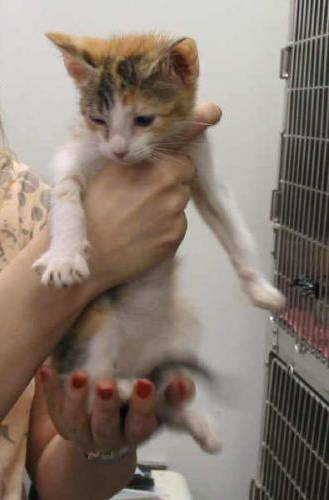

In [25]:
# Quinta Imagem
test_image = image.load_img('dataset_teste/2524.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

Image(filename='dataset_teste/2524.jpg')

In [26]:
# Previsão da quinta imagem
prediction

'Cachorro'

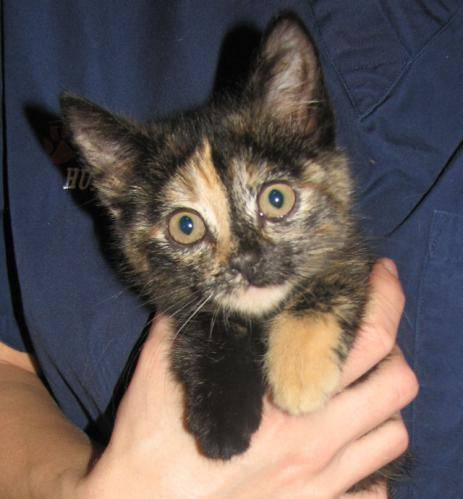

In [27]:
# Sexta Imagem
test_image = image.load_img('dataset_teste/2551.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

Image(filename='dataset_teste/2551.jpg')

In [28]:
# Previsão da sexta imagem
prediction

'Cachorro'